# Situacion Problema
Priscila de la Peña Schott A00826324


Se comienza por importar todas las librerias.

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt 


Se manda llamar la base de datos que se va a utilizar para este entregable.
Esta base de datos con el nombre de  "Times Higher Education World University Rankings” analiza el ranking a nivel mundial de 70 universidades de los años 2011-2016. 

In [3]:
df = pd.read_csv('timesData2.csv') 
df.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,Int Students
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25%,NaN,2011,5038.00
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,2243.0,6.9,27%,33 : 67,2011,605.61
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33%,37 : 63,2011,3654.42
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22%,42:58:00,2011,3431.12
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,27%,45:55:00,2011,2140.83
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57,91.2,18812.0,11.8,34%,46:54:00,2011,6396.08
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919.0,11.6,34%,46:54:00,2011,6772.46
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,36186.0,16.4,15%,50:50:00,2011,5427.90
8,9,Imperial College London,United Kingdom,89.2,90,94.5,88.3,92.9,90.6,15060.0,11.7,51%,37 : 63,2011,7680.60
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,11751.0,4.4,20%,50:50:00,2011,2350.20


## 1. Con que informacion cuenta la base de datos?

Se observan 15 variables con su respectivo tipo y un total de 2603 datos. Como se puede ver existen:
- 8 variables de tipo 'object'
- 6 variables de tipo 'float64'
- 1 variable de 'int64'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   float64
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
 14  Int Students            2603 non-null   

## 2. Cuales son las variables de significativas?

In [5]:
df.describe()

,teaching,research,citations,num_students,student_staff_ratio,year,Int Students
count,2603.000000,2603.000000,2603.000000,2544.000000,2544.000000,2603.000000,2603.000000
mean,37.801498,35.910257,60.921629,23873.758648,18.445283,2014.075682,3268.164437
std,17.604218,21.254805,23.073219,17675.946877,11.458698,1.685733,2693.174263
min,9.900000,2.900000,1.200000,462.000000,0.600000,2011.000000,0.000000
25%,24.700000,19.600000,45.500000,12637.750000,11.975000,2013.000000,1289.590000
50%,33.900000,30.500000,62.500000,20851.000000,16.100000,2014.000000,2678.200000
75%,46.400000,47.250000,79.050000,29991.000000,21.500000,2016.000000,4639.830000
max,99.700000,99.400000,100.000000,379231.000000,162.600000,2016.000000,18317.520000


Las variables importantes son: teaching, research y citations ya que son numericas. Estas siguen una escala del 1-100 por lo cual se pueden estandarizar. 


## 3. Como estan distribuidas estas variables importantes?

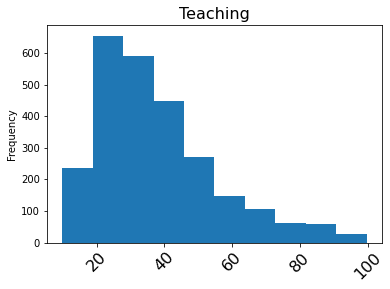

In [6]:
df['teaching'].plot(kind = 'hist')
plt.title('Teaching', fontsize = 16)
plt. xticks(fontsize=16, rotation=45)
plt.show()

Por medio del histograma de la variable "teaching" se observa el comportamiento y distribución de los datos. Es una distribución sesgada a la derecha.

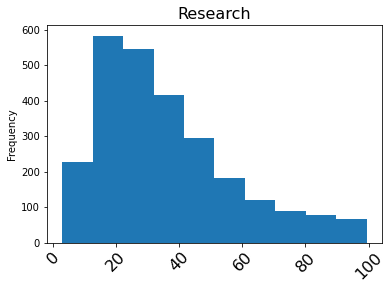

In [7]:
df['research'].plot(kind = 'hist')
plt.title('Research', fontsize = 16)
plt. xticks(fontsize=16, rotation=45)
plt.show()

Por medio del histograma de la variable "research" se observa el comportamiento y distribución de los datos. Es una distribución sesgada a la derecha.

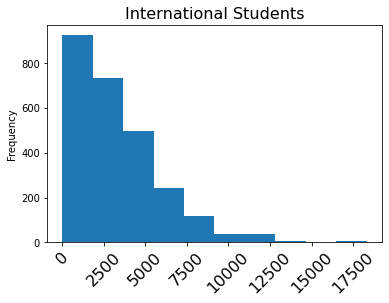

In [8]:
df['Int Students'].plot(kind = 'hist')
plt.title('International Students', fontsize = 16)
plt. xticks(fontsize=16, rotation=45)
plt.show()

Por medio del histograma de la variable "Int Students" se observa el comportamiento y distribución de los datos. Es una distribución sesgada a la derecha. Se puede concluir que la mayoria de los estudiantes son de su respectivo pais. 

In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import seaborn as sns
import pandas as pd

## 4. Existe correlacion entre la variable de "research" y "teaching"?

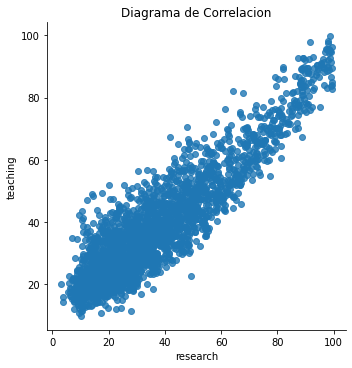

In [11]:
sns.lmplot(x='research', y='teaching', data=df,fit_reg=False)
plt.title('Diagrama de Correlacion')
plt.show()

Se puede concluir que la variable de research y teaching estan correlacionados ya que cuando uno aumenta el otro tambien y viseversa. 

## Conclusiones finales

Algunas limitaciones son: 
- Existen columnas que no tienen datos por lo que afectan al analisis.
- La variable de "world_rank" esta definida como object lo que no permite que se observe una correlacion con otras variables. 
- Cada año cuenta con un numero de datos diferente por lo que llega a afectar el analisis.

Siguientes pasos: 
- Hacer una revision de la base de datos para eliminar las filas con datos faltantes y los datos atipicos. 
- Analizar cada variable por separado por medio de diagramas o histogramas para analizar su comportamiento. 

## 5. Existen datos atipicos en las variables de interes?

Text(0.5, 1.0, 'Box plot de Research y Teaching')

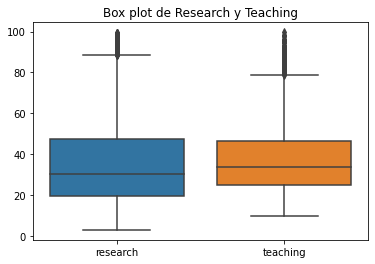

In [12]:
sns.boxplot(data=df.loc[:, ['research','teaching']],
           ).set_title('Box plot de Research y Teaching')

Con el diagrama de cajas se puede observar que ambas variables presentan datos atipicos puesto que muchos de sus datos se encuentran por encima de la media. 


## 6. Cual es la correlacion entre las variables?

In [13]:
variables = ['research', 'teaching', 'citations', 'num_students', 'student_staff_ratio']
df = df[variables].dropna()
df

,research,teaching,citations,num_students,student_staff_ratio
0,98.7,99.7,98.8,20152.0,8.9
1,98.0,97.7,99.9,2243.0,6.9
2,91.4,97.8,99.9,11074.0,9.0
3,98.1,98.3,99.2,15596.0,7.8
4,95.4,90.9,99.9,7929.0,8.4
...,...,...,...,...,...
2598,10.9,18.6,26.5,21958.0,15.3
2599,7.6,14.5,19.3,31268.0,28.7
2600,10.2,24.0,36.4,4122.0,3.7
2601,16.0,20.1,13.5,10117.0,12.1


In [14]:
df[variables].corr()

,research,teaching,citations,num_students,student_staff_ratio
research,1.000000,0.915715,0.526867,0.059921,-0.198841
teaching,0.915715,1.000000,0.506498,0.042844,-0.282630
citations,0.526867,0.506498,1.000000,-0.076886,-0.137737
num_students,0.059921,0.042844,-0.076886,1.000000,0.342824
student_staff_ratio,-0.198841,-0.282630,-0.137737,0.342824,1.000000


Se puede observar la correlacion que exite entre cada una de las variables. Las variables que mayor correlacion tienen es la de "research" y "teaching" puesto que el coeficiente de correlacion es de 0.915715.

In [15]:
x=df['research']
y=df['teaching']
x=x.to_frame()
y=y.to_frame()
type(x)

pandas.core.frame.DataFrame

In [16]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [17]:
import statsmodels.api as sm

In [18]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn import linear_model

In [20]:
lm=linear_model.LinearRegression()
lm

LinearRegression()

In [21]:
model_lm=lm.fit(x,y)

In [22]:
print('El intercepto es: ', model_lm.intercept_)
print('Los coefficientes son: ', model_lm.coef_)
print('El valor de R^2 es: ', model_lm.score(x,y))

El intercepto es:  [10.4596571]
Los coefficientes son:  [[0.75950805]]
El valor de R^2 es:  0.8385343300807053


In [23]:
model_ols=sm.OLS.from_formula('x~y', data=df)
result=model_ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 1.320e+04
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        02:03:27   Log-Likelihood:                -9071.9
No. Observations:                2544   AIC:                         1.815e+04
Df Residuals:                    2542   BIC:                         1.816e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.7299      0.401    -14.283      0.000      -6.517      -4.943
y              1.1040      0.010    114.897      0.000       1.085       1.123
==============================================================================
Omnibus:                       27.364   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.321
Skew:                          -0.237   Prob(JB):                     7.08e-07
Kurtosis:                       3.205   Cond. No.                         98.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [25]:
import seaborn as sns

Text(0.5, 1.0, "Correlacion entre 'research' y 'teacning'")

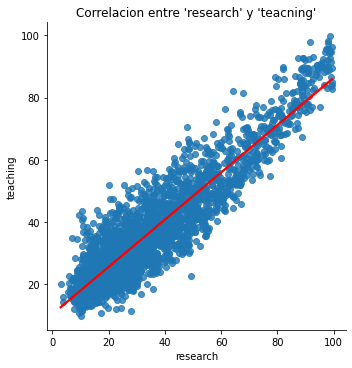

In [36]:
sns.lmplot(x='research',
y='teaching',data=df,line_kws={'color': 'red'})
ax = plt.gca()
ax.set_title("Correlacion entre 'research' y 'teacning'")

## 7. Cual es el impacto de Research en Teaching?
Teaching=b0+b1*Research

In [37]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model

In [44]:
modelA=sm.OLS.from_formula('teaching~research', data=df)
resultA=modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               teaching   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 1.320e+04
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        02:19:43   Log-Likelihood:                -8596.1
No. Observations:                2544   AIC:                         1.720e+04
Df Residuals:                    2542   BIC:                         1.721e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4597      0.277     37.801      0.000       9.917      11.002
research       0.7595      0.007    114.897      0.000       0.747       0.772
==============================================================================
Omnibus:                       64.224   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.762
Skew:                           0.386   Prob(JB):                     1.17e-15
Kurtosis:                       3.227   Cond. No.                         82.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observaciones:
- Variable dependiente: Teaching.
- Variable independiente: Research.
- R-squared: 0.839; por lo que este modelo es eficiente. Explica el 83% de los datos.
- Df Model: 1
- Intercept: <0.05, es estadisticamente significativo

Teaching=10.4597+0.7595*research

In [63]:
print('Valor de teaching de una universidad con un puntaje de research de 89.9: ', 10.4597+0.7595*89.9)
df.iloc[:2,:]

Valor de teaching de una universidad con un puntaje de research de 89.9:  78.73875


,research,teaching,citations,num_students,student_staff_ratio
0,98.7,99.7,98.8,20152.0,8.9
1,98.0,97.7,99.9,2243.0,6.9


In [48]:
print('Diferencia es: ', 99.7-78.73875)
print('Diferencia es: ', 97.7-78.73875)
resultA.resid

Diferencia es:  20.961250000000007
Diferencia es:  18.961250000000007


0       14.276898
1       12.808554
2       17.921307
3       13.332603
4        7.983275
          ...    
2598    -0.138295
2599    -1.731918
2600     5.793361
2601    -2.511786
2602    -8.158654
Length: 2544, dtype: float64

Text(0.5, 1.0, 'Regresion de Teaching vs Research')

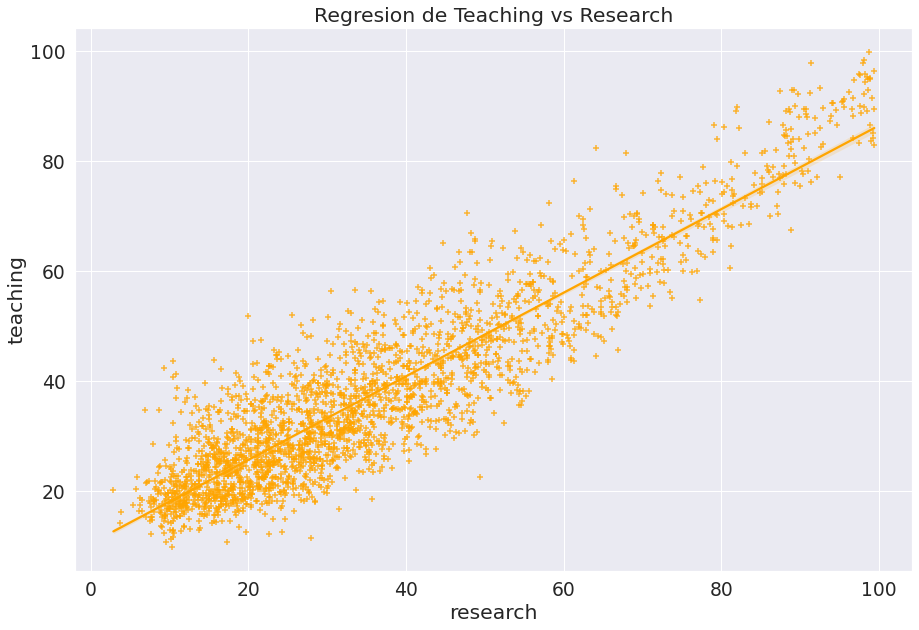

In [59]:

plt.figure(figsize=(15,10))
sns.set(font_scale=1.7)

reg_plot=sns.regplot(x='research',
            y='teaching',
            data=df,
            marker='+',
            color='orange'
           )
reg_plot.set_title('Regresion de Teaching vs Research')

In [60]:
RESIA=resultA.resid
RESIA

0       14.276898
1       12.808554
2       17.921307
3       13.332603
4        7.983275
          ...    
2598    -0.138295
2599    -1.731918
2600     5.793361
2601    -2.511786
2602    -8.158654
Length: 2544, dtype: float64

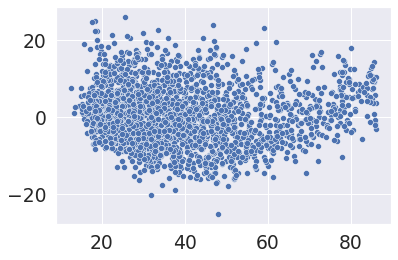

In [61]:
resi_plot=sns.scatterplot(x=resultA.fittedvalues,
                          y=RESIA)

Los residuales se comportan de manera inormal.